<a href="https://colab.research.google.com/github/insanemate033-gif/Real-Time-Stock-Market-Forecasting/blob/main/Stock_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import plotly.express as px
from datetime import datetime

In [ ]:

start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()

In [ ]:
tickers = ['AAPL']

In [ ]:


start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()

tickers = ['AAPL']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)
df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df = df.drop(['Adj Close', 'Volume'], axis=1)
df = df.reset_index() # we have to reset index
file_to_save = 'stock_data.csv' # Define the file name to save the data
print('Data saved to : %s' % file_to_save) # Correct the indentation
df.to_csv(file_to_save)
print(df.head(10))

[*********************100%%**********************]  1 of 1 completed

Data saved to : stock_data.csv
  Ticker       Date        Open        High         Low       Close
0   AAPL 2024-04-17  169.610001  170.649994  168.000000  168.000000
1   AAPL 2024-04-18  168.029999  168.639999  166.550003  167.039993
2   AAPL 2024-04-19  166.210007  166.399994  164.080002  165.000000
3   AAPL 2024-04-22  165.520004  167.259995  164.770004  165.839996
4   AAPL 2024-04-23  165.350006  167.050003  164.919998  166.899994
5   AAPL 2024-04-24  166.539993  169.300003  166.210007  169.020004
6   AAPL 2024-04-25  169.529999  170.610001  168.149994  169.889999
7   AAPL 2024-04-26  169.880005  171.339996  169.179993  169.300003
8   AAPL 2024-04-29  173.369995  176.029999  173.100006  173.500000
9   AAPL 2024-04-30  173.330002  174.990005  170.000000  170.330002


In [ ]:
print(df.head(10))

  Ticker       Date        Open        High         Low       Close
0   AAPL 2024-04-17  169.610001  170.649994  168.000000  168.000000
1   AAPL 2024-04-18  168.029999  168.639999  166.550003  167.039993
2   AAPL 2024-04-19  166.210007  166.399994  164.080002  165.000000
3   AAPL 2024-04-22  165.520004  167.259995  164.770004  165.839996
4   AAPL 2024-04-23  165.350006  167.050003  164.919998  166.899994
5   AAPL 2024-04-24  166.539993  169.300003  166.210007  169.020004
6   AAPL 2024-04-25  169.529999  170.610001  168.149994  169.889999
7   AAPL 2024-04-26  169.880005  171.339996  169.179993  169.300003
8   AAPL 2024-04-29  173.369995  176.029999  173.100006  173.500000
9   AAPL 2024-04-30  173.330002  174.990005  170.000000  170.330002


In [ ]:
# Sort DataFrame by date
df = df.sort_values('Date')

# Double check the result
df.head()


,Ticker,Date,Open,High,Low,Close
0,AAPL,2024-04-17,169.610001,170.649994,168.000000,168.000000
1,AAPL,2024-04-18,168.029999,168.639999,166.550003,167.039993
2,AAPL,2024-04-19,166.210007,166.399994,164.080002,165.000000
3,AAPL,2024-04-22,165.520004,167.259995,164.770004,165.839996
4,AAPL,2024-04-23,165.350006,167.050003,164.919998,166.899994


In [ ]:
fig = px.line(df, x= 'Date',
              y='Close',
              color='Ticker',
              title="Stock Market Performance for the Last 3 Months")
fig.show()

In [ ]:
fig = px.area(df, x='Date', y='Close',
              facet_col='Ticker',
              labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Apple')
fig.show()

In [ ]:
!pip install tensorflow

In [ ]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

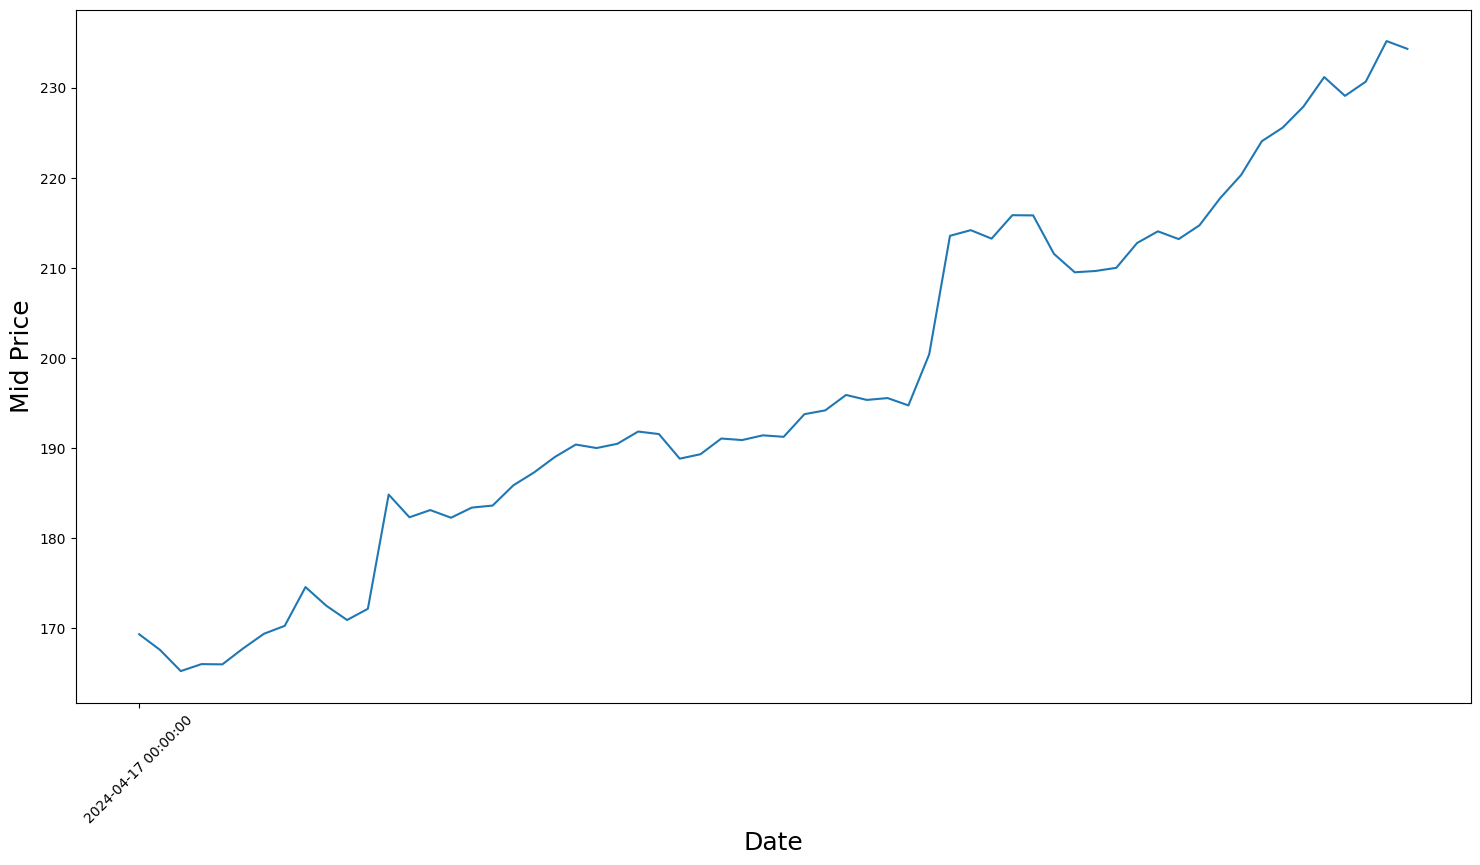

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()


In [ ]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].values
low_prices = df.loc[:,'Low'].values
mid_prices = (high_prices+low_prices)/2.0

In [ ]:
train_data = mid_prices[:40]
test_data = mid_prices[40:]


In [ ]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)


In [ ]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 40 # Change the smoothing window size to be less than the length of the training data
for di in range(0, len(train_data), smoothing_window_size): # Iterate up to the length of the training data
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# The following code is no longer needed as we've processed all training data in the loop
# scaler.fit(train_data[di+smoothing_window_size:,:])
# train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [ ]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)


In [ ]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(40):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)


In [ ]:
std_avg_predictions = []
mse_errors = []
std_avg_x = []
window_size = 10
for pred_idx in range(window_size,len(train_data)):
    if pred_idx >= len(df):
        date = dt.datetime.strptime(df.loc[len(df)-1,'Date'],'%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    # Check for NaN in the slice
    current_slice = train_data[pred_idx-window_size:pred_idx]
    if np.isnan(current_slice).any():
        print(f"Warning: NaN values found in slice at index {pred_idx}")

    # Calculate mean, handling potential division by zero
    mean_prediction = np.mean(current_slice) if len(current_slice) > 0 else np.nan
    std_avg_predictions.append(mean_prediction)

    # Calculate MSE, handling potential NaN
    mse = (mean_prediction - train_data[pred_idx])**2 if not np.isnan(mean_prediction) else np.nan
    mse_errors.append(mse)

    std_avg_x.append(date)

# Calculate mean MSE, ignoring NaN values
valid_mse_errors = [error for error in mse_errors if not np.isnan(error)]
if valid_mse_errors:
    print('MSE error for standard averaging: %.5f'%(0.5*np.mean(valid_mse_errors)))
else:
    print("All MSE errors are NaN. Investigate data and calculations.")

MSE error for standard averaging: 0.00437


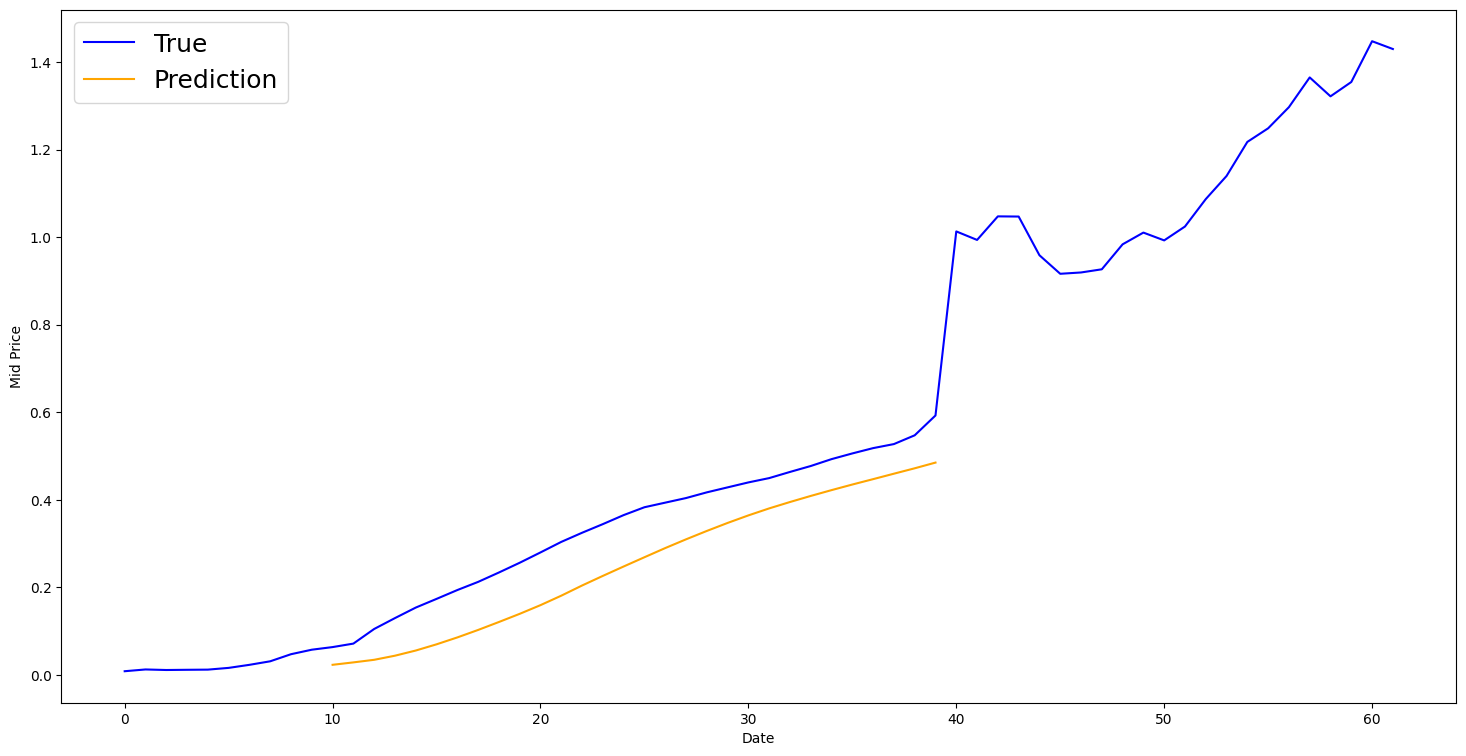

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
# Adjust the x-axis range to match the length of std_avg_predictions
plt.plot(range(window_size, len(std_avg_predictions) + window_size), std_avg_predictions, color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    # You probably want to store the index as a proxy for date here since you don't have the actual dates
    run_avg_x.append(pred_idx)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00052


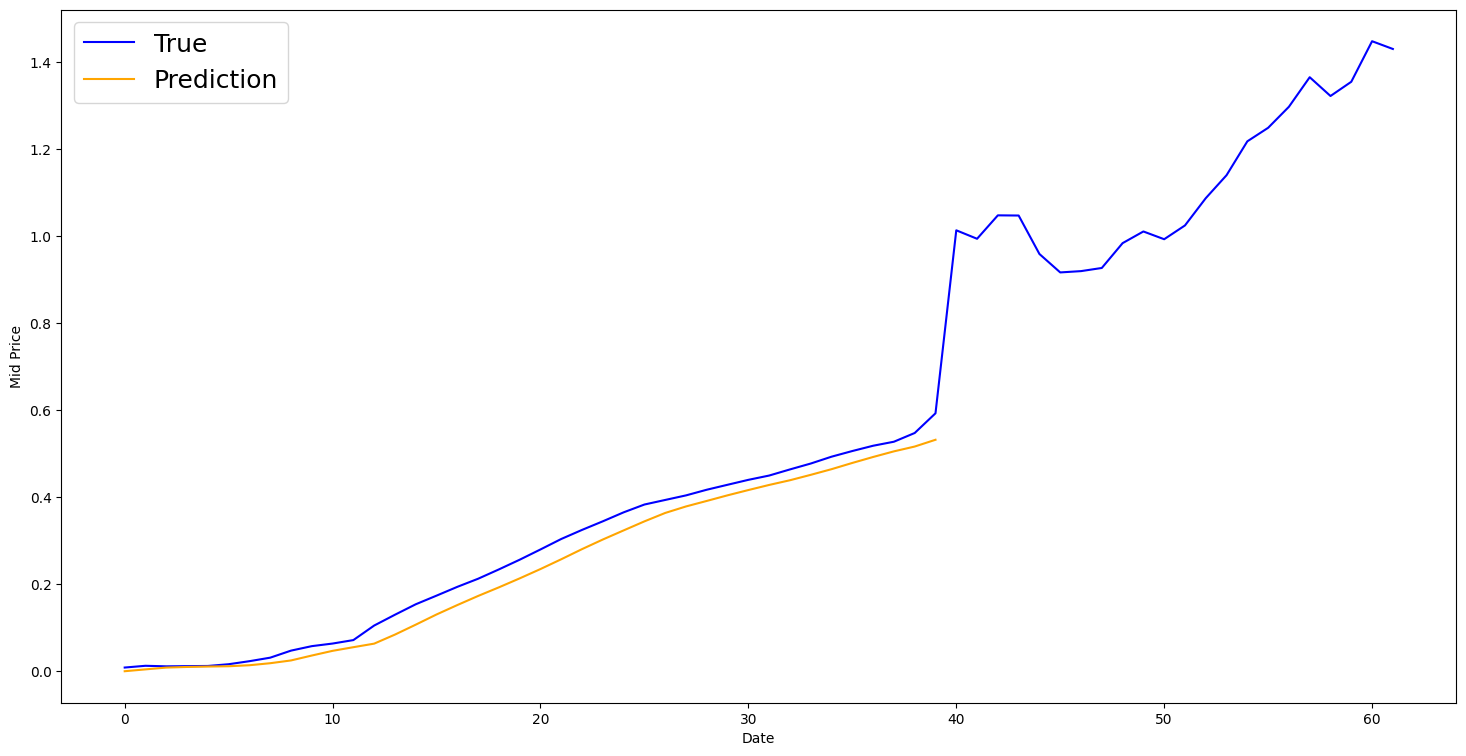

In [ ]:

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [ ]:

class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)




Unrolled index 0
	Inputs:  [0.0084558  0.03113253 0.15378882 0.30382305 0.41697663]

	Output: [0.012485   0.06358314 0.23391274 0.3650164  0.41697663]


Unrolled index 1
	Inputs:  [0.012485   0.04732171 0.17364074 0.32468274 0.42835286]

	Output: [0.0120875  0.07153864 0.23391274 0.32468274 0.46360162]


Unrolled index 2
	Inputs:  [0.0112365  0.05760714 0.1938362  0.3444293  0.43967822]

	Output: [0.0230459  0.10493539 0.25617453 0.3444293  0.46360162]


Unrolled index 3
	Inputs:  [0.01171707 0.06358314 0.21247783 0.3650164  0.4495295 ]

	Output: [0.01171707 0.10493539 0.25617453 0.40394536 0.4495295 ]


Unrolled index 4
	Inputs:  [0.0120875  0.07153864 0.23391274 0.3829652  0.46360162]

	Output: [0.04732171 0.07153864 0.25617453 0.41697663 0.51799965]


In [ ]:
import tensorflow as tf

# For TensorFlow v1 compatibility:
if int(tf.__version__.split('.')[0]) < 2:
    tf.reset_default_graph()
else:
    # For TensorFlow v2 and later:
    tf.compat.v1.reset_default_graph()

D = 64
num_unrollings = 10
batch_size = 32
num_nodes = [200,200,150]
n_layers = len(num_nodes)
dropout = 0.2

In [ ]:
import tensorflow as tf

# ... (your existing code)

# Input data.
train_inputs, train_outputs = [],[]

# Use tf.keras.Input instead of tf.placeholder
for ui in range(num_unrollings):
    train_inputs.append(tf.keras.Input(shape=(D,), name='train_inputs_%d'%ui))
    train_outputs.append(tf.keras.Input(shape=(64,), name='train_outputs_%d'%ui))

In [ ]:
import tensorflow as tf

# ... (your existing code)

lstm_cells = [
    tf.keras.layers.LSTMCell(units=num_nodes[li],
                            kernel_initializer=tf.keras.initializers.GlorotUniform(),
                            dropout=dropout # Apply dropout within each LSTM cell
                           )
 for li in range(n_layers)]

# Use tf.keras.layers.StackedRNNCells instead of tf.contrib.rnn.MultiRNNCell
multi_cell = tf.keras.layers.StackedRNNCells(lstm_cells)

# Remove the dropout argument from tf.keras.layers.RNN
multi_cell_with_dropout = tf.keras.layers.RNN(multi_cell)

w = tf.Variable(tf.keras.initializers.GlorotUniform()((num_nodes[-1], 1)), name='w')
b = tf.Variable(tf.random.uniform([1], -0.1, 0.1), name='b')

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.models import Model

# Define parameters
num_unrollings = 10
batch_size = 32
D = 64  # Dimensionality of the input features
lstm_units = 64  # Number of LSTM units

# Define input layer
inputs = Input(shape=(num_unrollings, D))

# Define LSTM layer
lstm = LSTM(lstm_units, return_sequences=False, return_state=True)
lstm_output, state_h, state_c = lstm(inputs)

# Define regression layer
regression_output = Dense(1)(lstm_output)

# Define the model
model = Model(inputs=inputs, outputs=regression_output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Create TensorFlow variables for cell state and hidden state
initial_c = tf.Variable(tf.zeros([batch_size, lstm_units]), trainable=False)
initial_h = tf.Variable(tf.zeros([batch_size, lstm_units]), trainable=False)

# Summary of the model
model.summary()

# Example: Generate some random data for demonstration
import numpy as np
train_inputs = np.random.rand(batch_size, num_unrollings, D)
train_targets = np.random.rand(batch_size, 64)

# Train the model (example)
model.fit(train_inputs, train_targets, epochs=10)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 64)]          0         
                                                                 
 lstm (LSTM)                 [(None, 64),              33024     
                              (None, 64),                        
                              (None, 64)]                        
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 33089 (129.25 KB)
Trainable params: 33089 (129.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.1738
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 0.0985
E

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

# Define parameters
num_unrollings = 10
batch_size = 32
D = 64  # Dimension of input features
hidden_units = 128  # Number of LSTM units

# Create input data and true outputs (targets)
train_inputs = [tf.random.normal((batch_size, D)) for _ in range(num_unrollings)]
true_outputs = tf.random.normal((batch_size, 64))  # Example true outputs

# Initialize LSTM cell state and hidden state
c = tf.zeros((batch_size, hidden_units))
h = tf.zeros((batch_size, hidden_units))

# Define LSTM cell and dense layer for regression
lstm_cell = layers.LSTMCell(hidden_units)
regression_layer = layers.Dense(64)

# Transform train_inputs to have shape [num_unrollings, batch_size, D]
train_inputs = tf.stack(train_inputs)

# Define the optimizer
optimizer = optimizers.Adam()

# Forward pass and loss calculation inside a GradientTape context
with tf.GradientTape() as tape:
    # Calculate LSTM outputs
    outputs = []
    for i in range(num_unrollings):
        output, (h, c) = lstm_cell(train_inputs[i], states=[h, c])
        outputs.append(output)

    # Stack the outputs
    outputs = tf.stack(outputs)

    # Feed the last LSTM output to the regression layer to get the final prediction
    final_output = outputs[-1]
    final_prediction = regression_layer(final_output)

    # Calculate Mean Squared Error
    mse_loss = tf.reduce_sum(losses.mean_squared_error(true_outputs, final_prediction))

# Calculate gradients
gradients = tape.gradient(mse_loss, lstm_cell.trainable_variables + regression_layer.trainable_variables)

# Apply gradients using the optimizer
optimizer.apply_gradients(zip(gradients, lstm_cell.trainable_variables + regression_layer.trainable_variables))

print("Final prediction shape:", final_prediction.shape)
print("Mean Squared Error Loss:", mse_loss.numpy())


Final prediction shape: (32, 64)
Mean Squared Error Loss: 32.248863


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses

# Define parameters
num_unrollings = 10
batch_size = 32
D = 64  # Dimension of input features
hidden_units = 128  # Number of LSTM units

# Create input data and true outputs (targets)
train_inputs = [tf.random.normal((batch_size, D)) for _ in range(num_unrollings)]
true_outputs = tf.random.normal((batch_size, 64))  # Example true outputs

# Initialize LSTM cell state and hidden state
c = tf.zeros((batch_size, hidden_units))
h = tf.zeros((batch_size, hidden_units))

# Define LSTM cell and dense layer for regression
lstm_cell = layers.LSTMCell(hidden_units)
regression_layer = layers.Dense(1)

# Transform train_inputs to have shape [num_unrollings, batch_size, D]
train_inputs = tf.stack(train_inputs)

# Define the optimizer
optimizer = optimizers.Adam()

# Forward pass and loss calculation inside a GradientTape context
with tf.GradientTape() as tape:
    # Calculate LSTM outputs
    outputs = []
    for i in range(num_unrollings):
        output, (h, c) = lstm_cell(train_inputs[i], states=[h, c])
        outputs.append(output)

    # Stack the outputs
    outputs = tf.stack(outputs)

    # Feed the last LSTM output to the regression layer to get the final prediction
    final_output = outputs[-1]
    final_prediction = regression_layer(final_output)

    # Calculate Mean Squared Error
    mse_loss = tf.reduce_sum(losses.mean_squared_error(true_outputs, final_prediction))

# Calculate gradients
gradients = tape.gradient(mse_loss, lstm_cell.trainable_variables + regression_layer.trainable_variables)

# Apply gradients using the optimizer
optimizer.apply_gradients(zip(gradients, lstm_cell.trainable_variables + regression_layer.trainable_variables))

print("Final prediction shape:", final_prediction.shape)
print("Mean Squared Error Loss:", mse_loss.numpy())

# Prediction-related calculations

# Placeholder for feeding in the input (sample_inputs)
sample_inputs = tf.random.normal((1, D))  # Single input sample with batch size 1

# Initialize state variables for prediction
sample_c = tf.zeros((1, hidden_units))
sample_h = tf.zeros((1, hidden_units))

# Define reset_sample_state function
def reset_sample_state():
    global sample_c, sample_h
    sample_c = tf.zeros((1, hidden_units))
    sample_h = tf.zeros((1, hidden_units))

# Function to make a prediction
def predict(sample_inputs):
    global sample_c, sample_h
    sample_output, (sample_h, sample_c) = lstm_cell(sample_inputs, states=[sample_h, sample_c])
    sample_prediction = regression_layer(sample_output)
    return sample_prediction

# Reset the sample state
reset_sample_state()

# Make a prediction
sample_prediction = predict(sample_inputs)
print("Sample prediction shape:", sample_prediction.shape)
print("Sample prediction:", sample_prediction.numpy())


Final prediction shape: (32, 1)
Mean Squared Error Loss: 32.781124
Sample prediction shape: (1, 1)
Sample prediction: [[-0.10829336]]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses

# Define parameters
num_unrollings = 10
batch_size = 32
D = 64  # Dimension of input features
hidden_units = 128  # Number of LSTM units
epochs = 20  # Number of training epochs

# Create input data and true outputs (targets)
train_inputs = [tf.random.normal((batch_size, D)) for _ in range(num_unrollings)]
true_outputs = tf.random.normal((batch_size, 1))  # Example true outputs

# Initialize LSTM cell state and hidden state
c = tf.zeros((batch_size, hidden_units))
h = tf.zeros((batch_size, hidden_units))

# Define LSTM cell and dense layer for regression
lstm_cell = layers.LSTMCell(hidden_units)
regression_layer = layers.Dense(1)

# Transform train_inputs to have shape [num_unrollings, batch_size, D]
train_inputs = tf.stack(train_inputs)

# Define the optimizer
optimizer = optimizers.Adam()

# Training and prediction over multiple epochs
for epoch in range(epochs):
    # Reset state at the beginning of each epoch
    c = tf.zeros((batch_size, hidden_units))
    h = tf.zeros((batch_size, hidden_units))

    with tf.GradientTape() as tape:
        # Calculate LSTM outputs
        outputs = []
        for i in range(num_unrollings):
            output, (h, c) = lstm_cell(train_inputs[i], states=[h, c])
            outputs.append(output)

        # Stack the outputs
        outputs = tf.stack(outputs)

        # Feed the last LSTM output to the regression layer to get the final prediction
        final_output = outputs[-1]
        final_prediction = regression_layer(final_output)

        # Calculate Mean Squared Error
        mse_loss = tf.reduce_sum(losses.mean_squared_error(true_outputs, final_prediction))

    # Calculate gradients
    gradients = tape.gradient(mse_loss, lstm_cell.trainable_variables + regression_layer.trainable_variables)

    # Apply gradients using the optimizer
    optimizer.apply_gradients(zip(gradients, lstm_cell.trainable_variables + regression_layer.trainable_variables))

    print(f"Epoch {epoch + 1}, Mean Squared Error Loss: {mse_loss.numpy()}")

    # Prediction step (example input)
    sample_inputs = tf.random.normal((1, D))  # Single input sample with batch size 1

    # Initialize state variables for prediction
    sample_c = tf.zeros((1, hidden_units))
    sample_h = tf.zeros((1, hidden_units))

    # Reset the sample state
    sample_c = tf.zeros((1, hidden_units))
    sample_h = tf.zeros((1, hidden_units))

    # Make a prediction
    sample_output, (sample_h, sample_c) = lstm_cell(sample_inputs, states=[sample_h, sample_c])
    sample_prediction = regression_layer(sample_output)

    print("Sample prediction:", sample_prediction.numpy())

print("Training completed.")


Epoch 1, Mean Squared Error Loss: 40.04885482788086
Sample prediction: [[-0.12521642]]
Epoch 2, Mean Squared Error Loss: 34.224212646484375
Sample prediction: [[0.2688348]]
Epoch 3, Mean Squared Error Loss: 28.92184829711914
Sample prediction: [[-0.2992108]]
Epoch 4, Mean Squared Error Loss: 24.063739776611328
Sample prediction: [[-0.14851351]]
Epoch 5, Mean Squared Error Loss: 19.59754180908203
Sample prediction: [[0.01507968]]
Epoch 6, Mean Squared Error Loss: 15.498388290405273
Sample prediction: [[-0.27756977]]
Epoch 7, Mean Squared Error Loss: 11.771181106567383
Sample prediction: [[-0.01661071]]
Epoch 8, Mean Squared Error Loss: 8.450674057006836
Sample prediction: [[0.10418374]]
Epoch 9, Mean Squared Error Loss: 5.600741386413574
Sample prediction: [[0.04681824]]
Epoch 10, Mean Squared Error Loss: 3.311300754547119
Sample prediction: [[0.08944295]]
Epoch 11, Mean Squared Error Loss: 1.6868667602539062
Sample prediction: [[0.08430245]]
Epoch 12, Mean Squared Error Loss: 0.8150630

Epoch 1, Mean Squared Error Loss: 31.043413162231445
Epoch 2, Mean Squared Error Loss: 25.757898330688477
Epoch 3, Mean Squared Error Loss: 21.007770538330078
Epoch 4, Mean Squared Error Loss: 16.742294311523438
Epoch 5, Mean Squared Error Loss: 12.935074806213379
Epoch 6, Mean Squared Error Loss: 9.582290649414062
Epoch 7, Mean Squared Error Loss: 6.701066017150879
Epoch 8, Mean Squared Error Loss: 4.327012062072754
Epoch 9, Mean Squared Error Loss: 2.507838726043701
Epoch 10, Mean Squared Error Loss: 1.288388729095459
Epoch 11, Mean Squared Error Loss: 0.6797909736633301
Epoch 12, Mean Squared Error Loss: 0.6114848852157593
Epoch 13, Mean Squared Error Loss: 0.8982495069503784
Epoch 14, Mean Squared Error Loss: 1.286529779434204
Epoch 15, Mean Squared Error Loss: 1.5703082084655762
Epoch 16, Mean Squared Error Loss: 1.665266990661621
Epoch 17, Mean Squared Error Loss: 1.5915815830230713
Epoch 18, Mean Squared Error Loss: 1.4157910346984863
Epoch 19, Mean Squared Error Loss: 1.2035193

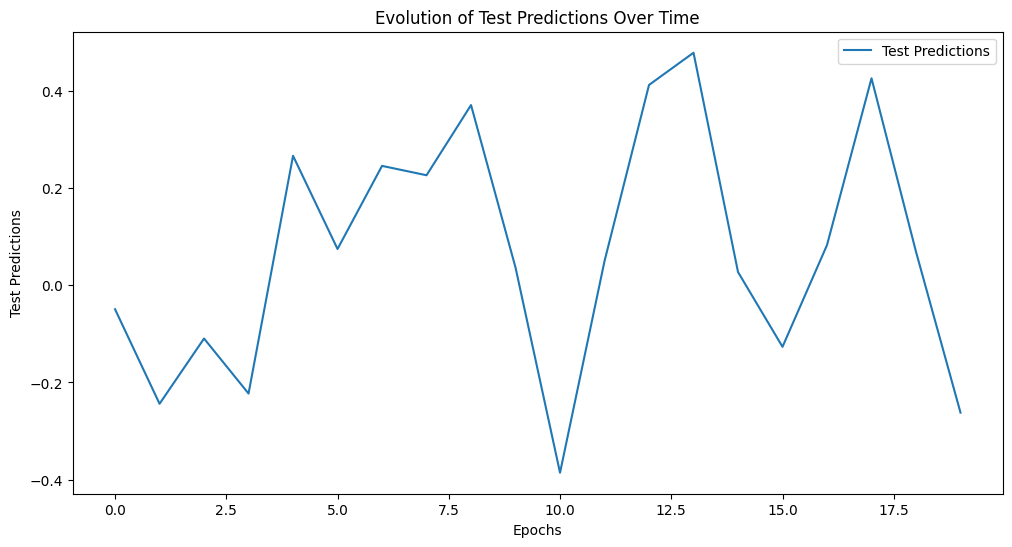

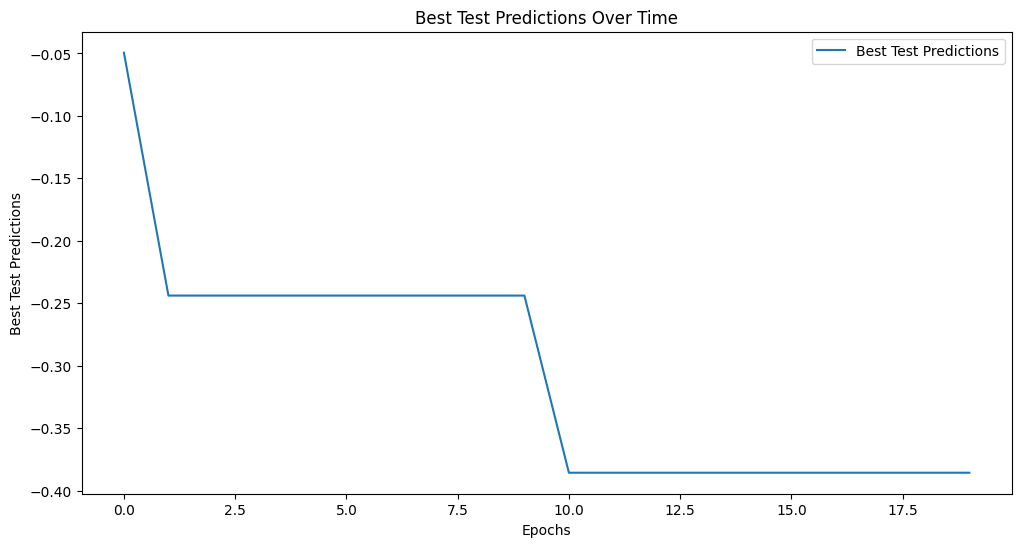

Standard Averaging MSE Loss: 0.004
LSTM Final MSE Loss: 0.9984059929847717


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
import matplotlib.pyplot as plt

# Define parameters
num_unrollings = 10
batch_size = 32
D = 64  # Dimension of input features
hidden_units = 128  # Number of LSTM units
epochs = 20  # Number of training epochs

# Create input data and true outputs (targets)
train_inputs = [tf.random.normal((batch_size, D)) for _ in range(num_unrollings)]
true_outputs = tf.random.normal((batch_size, 1))  # Example true outputs

# Initialize LSTM cell state and hidden state
c = tf.zeros((batch_size, hidden_units))
h = tf.zeros((batch_size, hidden_units))

# Define LSTM cell and dense layer for regression
lstm_cell = layers.LSTMCell(hidden_units)
regression_layer = layers.Dense(1)

# Transform train_inputs to have shape [num_unrollings, batch_size, D]
train_inputs = tf.stack(train_inputs)

# Define the optimizer
optimizer = optimizers.Adam()

# Lists to store loss and predictions for visualization
train_losses = []
test_predictions = []

# Training and prediction over multiple epochs
for epoch in range(epochs):
    # Reset state at the beginning of each epoch
    c = tf.zeros((batch_size, hidden_units))
    h = tf.zeros((batch_size, hidden_units))

    with tf.GradientTape() as tape:
        # Calculate LSTM outputs
        outputs = []
        for i in range(num_unrollings):
            output, (h, c) = lstm_cell(train_inputs[i], states=[h, c])
            outputs.append(output)

        # Stack the outputs
        outputs = tf.stack(outputs)

        # Feed the last LSTM output to the regression layer to get the final prediction
        final_output = outputs[-1]
        final_prediction = regression_layer(final_output)

        # Calculate Mean Squared Error
        mse_loss = tf.reduce_sum(losses.mean_squared_error(true_outputs, final_prediction))

    # Calculate gradients
    gradients = tape.gradient(mse_loss, lstm_cell.trainable_variables + regression_layer.trainable_variables)

    # Apply gradients using the optimizer
    optimizer.apply_gradients(zip(gradients, lstm_cell.trainable_variables + regression_layer.trainable_variables))

    # Store loss for visualization
    train_losses.append(mse_loss.numpy())

    # Prediction step (example input)
    sample_inputs = tf.random.normal((1, D))  # Single input sample with batch size 1

    # Initialize state variables for prediction
    sample_c = tf.zeros((1, hidden_units))
    sample_h = tf.zeros((1, hidden_units))

    # Make a prediction
    sample_output, (sample_h, sample_c) = lstm_cell(sample_inputs, states=[sample_h, sample_c])
    sample_prediction = regression_layer(sample_output)

    # Store prediction for visualization
    test_predictions.append(sample_prediction.numpy()[0][0])

    print(f"Epoch {epoch + 1}, Mean Squared Error Loss: {mse_loss.numpy()}")

# Visualize the predictions and loss

# Evolution of test predictions over time
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), test_predictions, label='Test Predictions')
plt.xlabel('Epochs')
plt.ylabel('Test Predictions')
plt.title('Evolution of Test Predictions Over Time')
plt.legend()
plt.show()

# Best test prediction over time
best_test_predictions = [min(test_predictions[:i+1]) for i in range(len(test_predictions))]
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), best_test_predictions, label='Best Test Predictions')
plt.xlabel('Epochs')
plt.ylabel('Best Test Predictions')
plt.title('Best Test Predictions Over Time')
plt.legend()
plt.show()

# Compare to standard averaging MSE loss
standard_averaging_mse_loss = 0.004
print(f"Standard Averaging MSE Loss: {standard_averaging_mse_loss}")
print(f"LSTM Final MSE Loss: {train_losses[-1]}")
